## Problem Statement


#### US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

#### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


In [213]:
## Import libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir('C:\\Users\\Asus\\Downloads')

import warnings
warnings.filterwarnings('ignore')


#### Data Reading and Data understanding


In [51]:

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB



- data contains 730 rows
- data contains 15 continuous columns 
- here cnt is the dependent variable and remaining are independent variables


#### Data cleaning

In [53]:
# Count of missing values for various columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- data does not contains any missing values

In [54]:
#checking for the duplicates
len(df[df.duplicated()])

0

- no duplicate values

In [56]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


 #### features in the dataset
    - instant: record index,it's just  represent the entry number so we can drop it
	- dteday : date,but dataset contains the year,month and weekday seperately so we can drop this
    - season : season (1:spring, 2:summer, 3:fall, 4:winter),here we give the names to the seasons according to their number then it will be easy for us to create dummy variables
	- yr : year (0: 2018, 1:2019), it contains year in boolean format 
	- mnth : month ( 1 to 12) here we have to names to the month number to create a dummy variables
    - holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) it is given in boolean format 
	- weekday : here we need to give the names to the day of the week(from 0 to 6)to create dummy variables
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : here give the names to that number to create dummy variables
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy as 'clear to partly cloudy'
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist as 'mist and cloudy'
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds as 'light snow and light rain'
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as 'heavy Rain and heavy snow'
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of unregistered users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
	

In [57]:
# drop the columns 
df.drop(columns = ['instant','dteday'], inplace = True)

In [58]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [59]:
##now give the names to the numbers in the features

In [60]:
df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace= True)


df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Aprl',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace= True)

df['weekday'].replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'},inplace = True)

df['weathersit'].replace({1:'clear to partly cloudy',2:'mist and cloudy',3:'light snow and light rain',4:'heavy rain and heavy snow'},inplace= True)

In [61]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,mist and cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,mist and cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,clear to partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,clear to partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,clear to partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [63]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- from the above weatersit given only three numbers 1,2 and 3

## Exploratory data analysis

#### Univariate analysis


In [64]:
# take the list of continuous variables and list of object type variables
df_cont=[i for i in df if df[i].dtype!='object']
print(len(df_cont))
df_obj=[i for i in df if df[i].dtype == 'object']
print(len(df_obj))





10
4


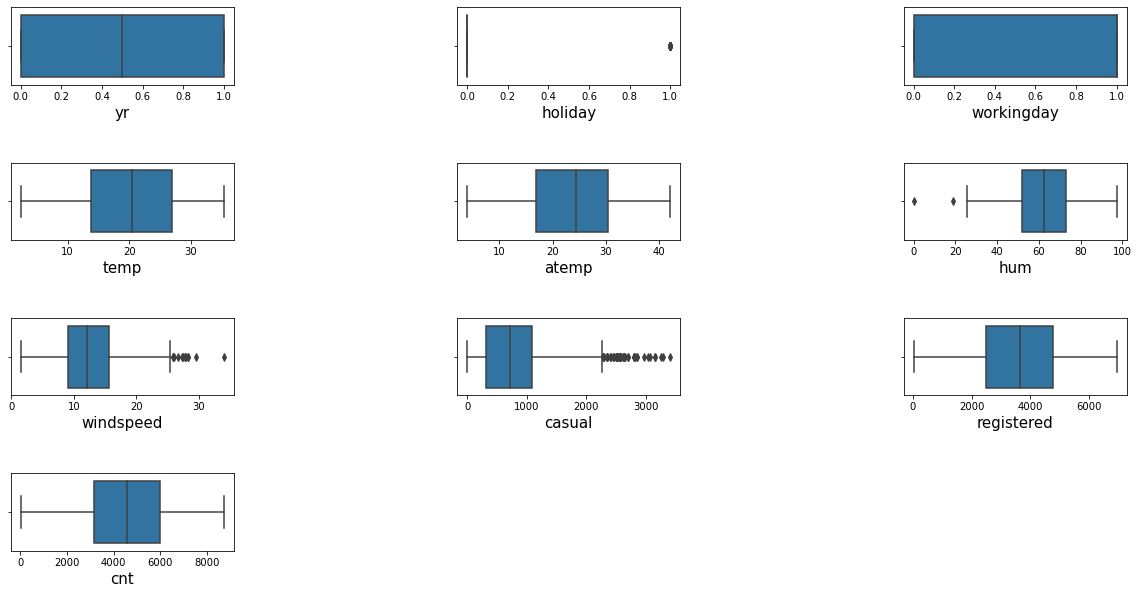

In [30]:
#Box plot for numerical variables
i=1
plt.figure(figsize=(20,10))
for col in df_cont: 
    plt.subplot(4,3,i)
    sns.boxplot(df[col])
    plt.xlabel(col,size=15)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()

 - from the above humidity,wind speed and casual have outliers remaining all are normally distributed
 - target variable (cnt) is also normally distributed
 - here year , workingday and holiday are binary variables

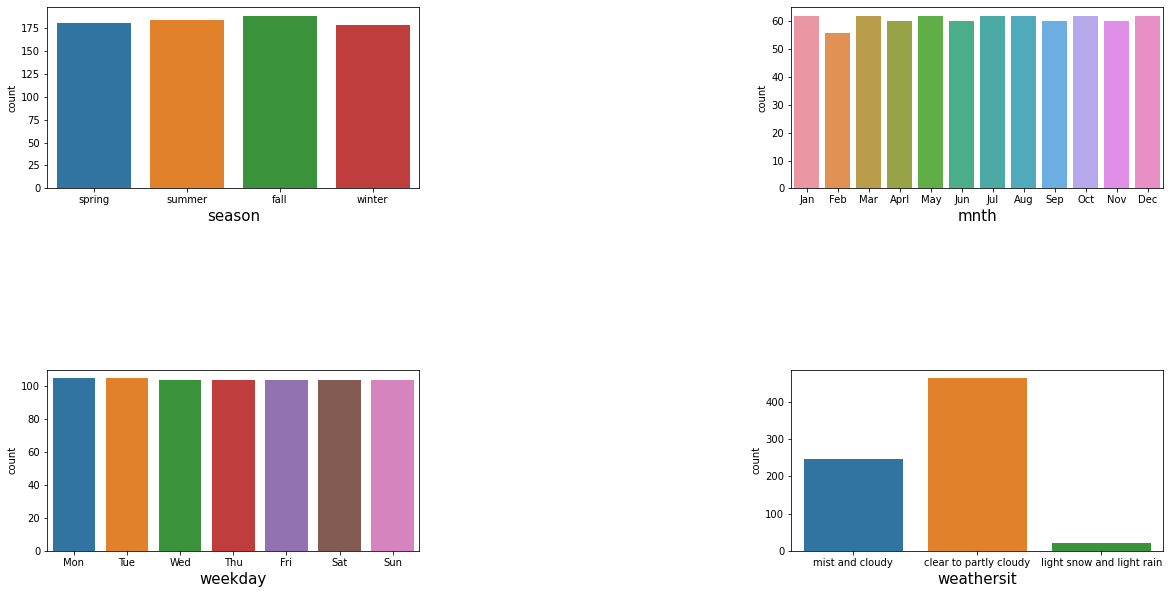

In [31]:
# analysis for object variables
i=1
plt.figure(figsize=(20,10))
for col in df_obj: 
    plt.subplot(2,2,i)
    sns.countplot(df[col])
    plt.xlabel(col,size=15)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()


- from the above fall is the longest season and then summer,spring,then winter
- here only three types of wheathersits are present. in them clear to partly cloudy for most no.of days


#### Bivariate analysis

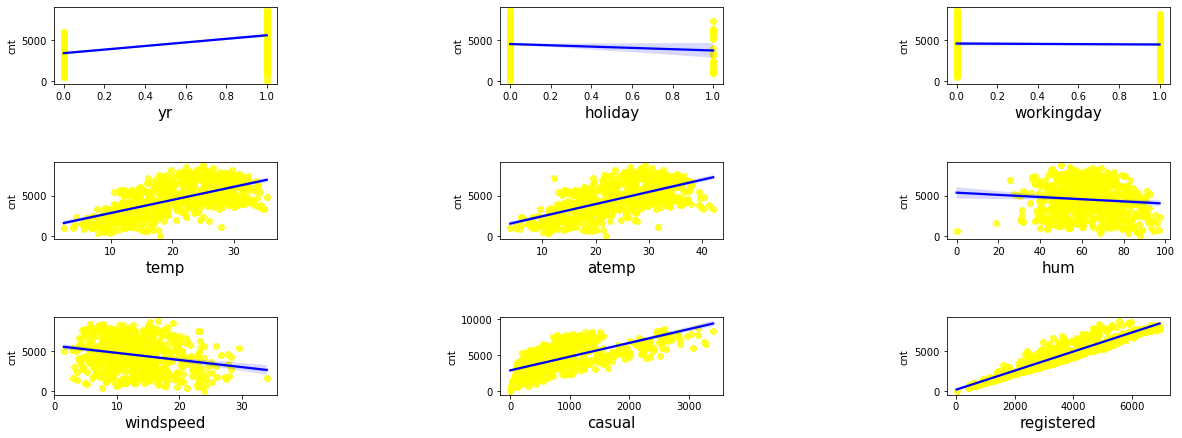

In [37]:
# here we do bivariate analysis for independant variables and target variable

i=1
plt.figure(figsize=(20,10))
for col in df_cont: 
    
    if col!='cnt':
        plt.subplot(4,3,i)
        sns.regplot(x=df[col], y = df['cnt'],scatter_kws={'color':'yellow'}, line_kws={'color':'blue'})
        plt.xlabel(col,size=15)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()




- from the above year,atemp,temp,casual and registered are directly prepotional to target variables
- here windspeed and humidity are showing iverse propotion to the target variable
- bike demand is justlow in holiday 

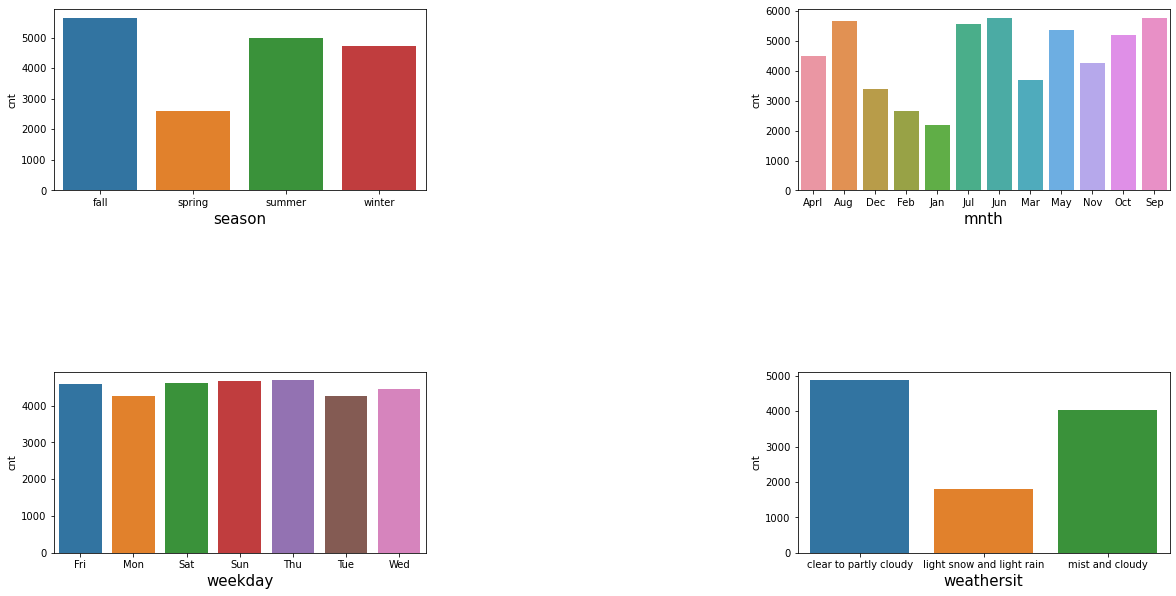

In [39]:
# Bivariate analysis for object variables
i=1
plt.figure(figsize=(20,10))
for col in df_obj: 
    plt.subplot(2,2,i)
    sns.barplot(y=df.groupby(by=col).mean()['cnt'],
                x=df.groupby(by=col).mean().index)
    plt.xlabel(col,size=15)
    i=i+1
plt.subplots_adjust(hspace=1,wspace=1) 
plt.show()


- from the above bike demand is high in fall season and low in spring season
- jun and september bike demand is high and low in jan
- In the weekends thu to sunday are having similar high bike demand 
- bike demand is high in clear to partly cloudy days and low in light snow and light rain


In [ ]:
#intervariable  relationsships using pair plot

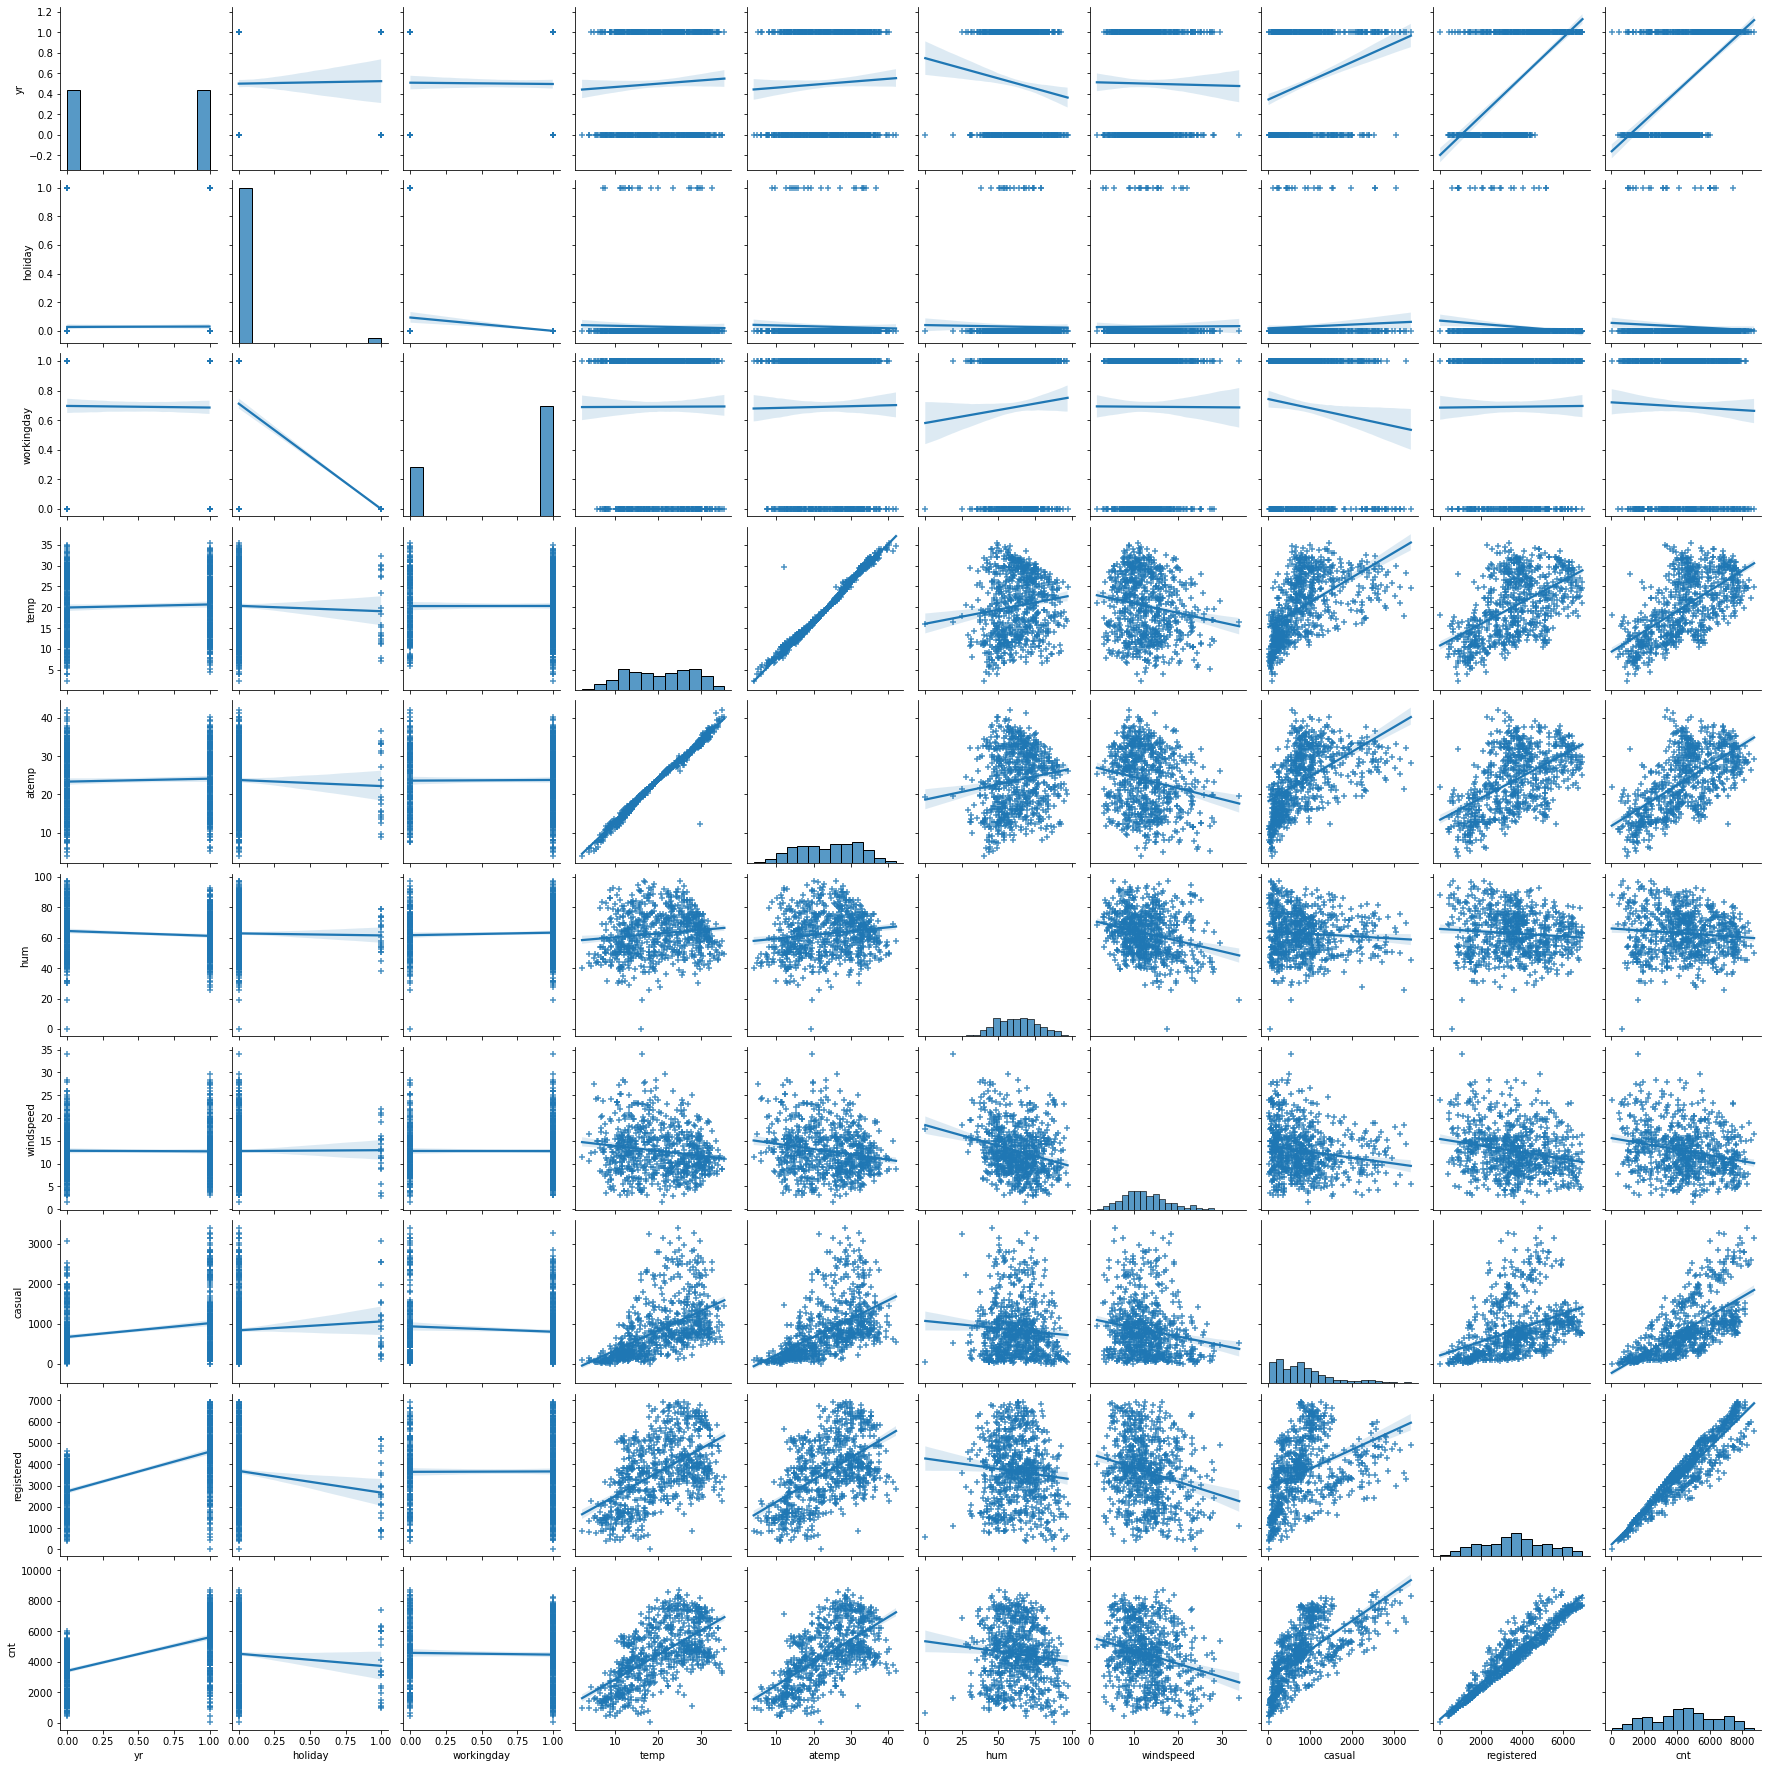

In [41]:
sns.pairplot(df,kind='reg',markers='+')
plt.show()

- from the above target variable is directly propotional to year,temp,atemp,casual and registered 
- target is inversly propotional to hum and windspeed
- like target registered and casual are directly propotional to temp,atemp,year and inversly propotional to hum and windspeed
- here target variable is summation of registered and casual and they can completely explain the target variable.hence we drop them


In [65]:
#drop the casual and registered columns
df.drop(columns=['casual','registered'],inplace = True)


In [66]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear to partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear to partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear to partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


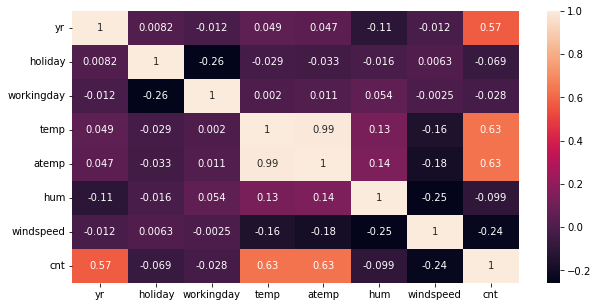

In [67]:
#let's see the correlation between the variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot= True)
plt.show()

- from the above year,temp,atemp having positive relationship with target variable 
- holiday,working day,humidity and windspeed have negative relation with target variable
   

## linear regresion model development
 Here we develop the multiple linear regression model beacuse target varible has a relationship with multiple independent features.Here we know the target variable so it is a supervised ml model 

#### Data preparation
 Here we first create dummy variables to categorical columns
 

In [70]:
cat = df.select_dtypes(include = ['object'])

In [71]:
cat.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,mist and cloudy
1,spring,Jan,Tue,mist and cloudy
2,spring,Jan,Wed,clear to partly cloudy
3,spring,Jan,Thu,clear to partly cloudy
4,spring,Jan,Fri,clear to partly cloudy


In [73]:
cat_dummies = pd.get_dummies(cat, drop_first = True)

In [74]:
# Let's drop all the categorical columns from the df datafrmae

df.drop(columns = list(cat.columns), inplace = True)

In [75]:
df  = pd.concat([df, cat_dummies], axis  = 1)

In [76]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow and light rain,weathersit_mist and cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


- from the above we can see there are 30 columns which contains  dummies for given categorical columns

#### Split the Data into train and test data
 here __train data__ is used for finding the coefficients in train model  and __test data__ is used to test the train model

In [77]:
# import the library for model building

from sklearn.model_selection import train_test_split


In [78]:
#split the data
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [81]:
df_train.shape

(510, 30)

In [83]:
df_test.shape

(220, 30)

- from the above train data contains __70%__ and test data contains __30%__

### Rescaling  the data
 after spliting we do scaling to numerical variables beacause they are all having different scale so we need to rescale the data.here we use minmax scalling.minmax scalling gives the values betwen 0 and 1.here we choose minmax scaling because there are some binary variables are present in data 

In [88]:
# select the numerical columns
num = df.select_dtypes(include = ['int64', 'float64'])

In [89]:
num_var = list(num.columns)

In [90]:
#import library and create a instane to minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler=MinMaxScaler()

In [92]:
# let's do scalling
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [93]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow and light rain,weathersit_mist and cloudy
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1.0,0.0,1.0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0.0,0.0,0.0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


### split the variables as __X__ and__Y__
 here X represents the independent variable and y represents target variable

In [94]:
X_train = df_train.drop(columns = 'cnt')
y_train = df_train['cnt']

## Ml modeling
here we use automated selection for initial stage later we do manully.RFE(Recursive feature elemination) is the automated selection

In [97]:
#import the library and create instance for liner regression

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe = RFE(lm, 15)

rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [98]:
#columns in train data
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_light snow and light rain',
       'weathersit_mist and cloudy'],
      dtype='object')

In [99]:
#lets check for which columns is supports
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True])

In [100]:
col = list(X_train.columns[rfe.support_])

In [122]:
len(col)

15

In [101]:
print(col)

['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_light snow and light rain', 'weathersit_mist and cloudy']


In [153]:
#let's crete a dataframe for RFE selected features
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_light snow and light rain,weathersit_mist and cloudy
576,1.0,0.0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,0.0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,0.0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,0.0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0.0,0.0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


### Manual modeling
here we using statsmodel for manual modeling.here we use statemode to devlop the linear regression model usin OLS(ordinary least squares) method and VIF(varience influence factor)
- ols is aimed to minimize sum residuals squares to determine the most idael regresion line
- vif is used to determine thr variable that needs to be dropped to handle the multicollinearity


In [154]:
#import the library
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          8.15e-189
Time:                        16:28:15   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


- from the above summer,dec and jan having p value greater than 0.005

In [155]:
X_train_rfe.head()


,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_light snow and light rain,weathersit_mist and cloudy
576,1.0,1.0,0.0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1.0,0.0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1.0,0.0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1.0,0.0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0.0,0.0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [105]:
#lets caluculate VIF


In [106]:
#IMPORT library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [156]:
X_train_vif = X_train_rfe.drop(columns = 'const')
vif = pd.DataFrame()
vif['features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(len(X_train_vif.columns))]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,yr,2.09
1,holiday,1.06
2,temp,17.79
3,hum,30.89
4,windspeed,4.72
5,season_spring,4.37
6,season_summer,2.82
7,season_winter,4.06
8,mnth_Dec,1.56
9,mnth_Jan,1.75


- from the above hum and temp are having high vif so we need to drop them
- first drop humidity and see the  p values

In [157]:
# drop the humcolumn

x_train2=X_train_rfe.drop(columns = 'hum')

In [121]:
lm2 = sm.OLS(y_train, x_train2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          4.75e-186
Time:                        15:19:54   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


- from the above nov and dec months and summer season showing high p value

In [158]:
# again check the VIF
X_train2_vif = x_train2.drop(columns = 'const')
vif = pd.DataFrame()
vif['features'] = X_train2_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train2_vif.values, i) for i in range(len(X_train2_vif.columns))]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,yr,2.07
1,holiday,1.06
2,temp,5.17
3,windspeed,4.67
4,season_spring,2.89
5,season_summer,2.24
6,season_winter,2.95
7,mnth_Dec,1.47
8,mnth_Jan,1.66
9,mnth_Jul,1.59


- from the above vif for temp reduced but value greater than 5  and from ols summary summer has p value so first drop summer

In [159]:
#drop summer
x_train3=x_train2.drop(columns = 'season_summer')
lm3= sm.OLS(y_train, x_train3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          4.08e-186
Time:                        16:28:51   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [160]:
# again check the VIF
X_train3_vif = x_train3.drop(columns = 'const')
vif = pd.DataFrame()
vif['features'] = X_train3_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train3_vif.values, i) for i in range(len(X_train3_vif.columns))]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,yr,2.06
1,holiday,1.06
2,temp,4.67
3,windspeed,4.05
4,season_spring,2.36
5,season_winter,2.55
6,mnth_Dec,1.46
7,mnth_Jan,1.65
8,mnth_Jul,1.36
9,mnth_Nov,1.81


- from the above temp comes to below 5 but from ols summary nov has high p value

In [ ]:
# drop nov column

In [162]:

x_train4=x_train3.drop(columns = 'mnth_Nov')
lm4= sm.OLS(y_train, x_train4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          5.72e-186
Time:                        16:29:25   Log-Likelihood:                 499.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [163]:
# again check the VIF
X_train4_vif = x_train4.drop(columns = 'const')
vif = pd.DataFrame()
vif['features'] = X_train4_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train4_vif.values, i) for i in range(len(X_train4_vif.columns))]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,yr,2.06
1,holiday,1.04
2,temp,4.63
3,windspeed,4.01
4,season_spring,2.36
5,season_winter,1.64
6,mnth_Dec,1.29
7,mnth_Jan,1.64
8,mnth_Jul,1.36
9,mnth_Sep,1.20


- from the above vif and ols summary  dec has high p value so drop the dec


In [164]:
#drop dec month
x_train5=x_train4.drop(columns = 'mnth_Dec')
lm5= sm.OLS(y_train, x_train5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          2.87e-186
Time:                        16:29:44   Log-Likelihood:                 497.01
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     498   BIC:                            -919.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [165]:
# again check the VIF
X_train5_vif = x_train5.drop(columns = 'const')
vif = pd.DataFrame()
vif['features'] = X_train5_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train5_vif.values, i) for i in range(len(X_train5_vif.columns))]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,yr,2.06
1,holiday,1.04
2,temp,4.63
3,windspeed,4.01
4,season_spring,2.24
5,season_winter,1.39
6,mnth_Jan,1.60
7,mnth_Jul,1.36
8,mnth_Sep,1.20
9,weathersit_light snow and light rain,1.08


In [ ]:
-from the above jan has high p value ,and  vif for features are below 5.so drop jan column

In [167]:
# drop jan 
x_train6=x_train5.drop(columns = 'mnth_Jan')
lm6= sm.OLS(y_train, x_train6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          3.10e-186
Time:                        16:30:09   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
- from the above rsquare and adjusted R square are having littile impact but p value is good and model contains 10 variables

In [134]:
# again check the VIF
X_train6_vif = x_train6.drop(columns = 'const')
vif = pd.DataFrame()
vif['features'] = X_train6_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train6_vif.values, i) for i in range(len(X_train6_vif.columns))]
vif['VIF'] = round(vif['VIF'],2)
vif

,features,VIF
0,yr,2.06
1,holiday,1.04
2,temp,4.61
3,windspeed,4.00
4,season_spring,1.64
5,season_winter,1.39
6,mnth_Jul,1.35
7,mnth_Sep,1.20
8,weathersit_light snow and light rain,1.08
9,weathersit_mist and cloudy,1.52


- from the above VIF are under proper limit so the variables are no more related to one or more combination of more than one variable. so the above model is valid


### making predictions for train data


In [180]:
y_pred_train = lm6.predict(x_train6)
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [202]:
#import library
from sklearn.metrics import r2_score

r2_train=r2_score(y_train, y_pred_train)
r2_train

0.8322027416440079

In [182]:
#### Residual analysis
residuals=y_train-y_pred_train

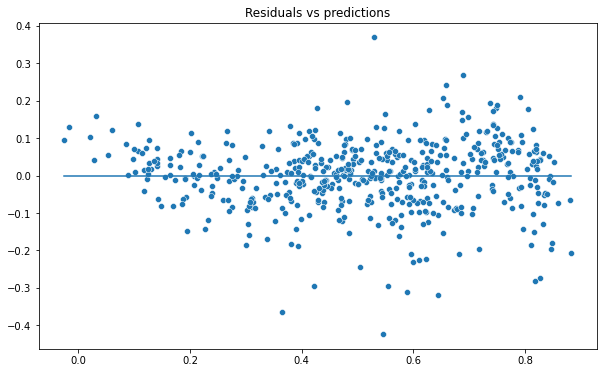

In [195]:
#checking for distribution of errors
plt.figure(figsize=(10,6))
sns.scatterplot(y=residuals.values, x= y_pred_train.values)
sns.lineplot(y=residuals.mean(), x= y_pred_train.values)
plt.title('Residuals vs predictions')
plt.show()


- from the above residual mean is nearly Zero

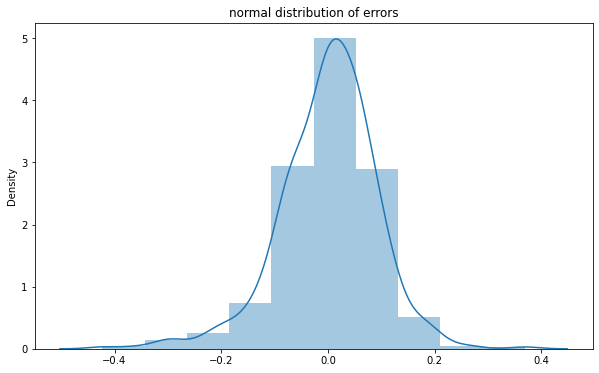

In [216]:
# plot the error distribution
plt.figure(figsize=(10,6))
sns.distplot(residuals, bins=10)
plt.title('normal distribution of errors')
plt.show()


- from the above normal distribution of errors arround mean of 0

## Model Evaluation


### Making Predictions

In [ ]:
# here we make predictions using test data

In [168]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow and light rain,weathersit_mist and cloudy
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0.0,0.0,0.0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0.0,0.0,0.0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [137]:
df_test[num_var] = scaler.transform(df_test[num_var])

In [138]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light snow and light rain,weathersit_mist and cloudy
184,0.0,1.0,0.0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,0.0,1.0,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0.0,0.0,0.0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0.0,0.0,1.0,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0.0,0.0,0.0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [169]:
X_test = df_test.drop(columns = 'cnt')
y_test = df_test['cnt']

In [170]:
# columns in the final model
retain = list(X_train6_vif.columns)

In [171]:
print(retain)

['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_light snow and light rain', 'weathersit_mist and cloudy']


In [172]:
# lets take the dataframe with remaing columns of test data
X_test_rfe = X_test[retain]

In [173]:
X_test_rfe

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weathersit_light snow and light rain,weathersit_mist and cloudy
184,0.0,1.0,0.831783,0.084219,0,0,1,0,0,1
535,1.0,0.0,0.901354,0.153728,0,0,0,0,0,0
299,0.0,0.0,0.511964,0.334206,0,1,0,0,0,1
221,0.0,0.0,0.881625,0.339570,0,0,0,0,0,0
152,0.0,0.0,0.817246,0.537414,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.519232,0.283397,0,1,0,0,0,0
127,0.0,0.0,0.584649,0.069510,0,0,0,0,0,0
640,1.0,0.0,0.745598,0.052115,0,1,0,0,0,1
72,0.0,0.0,0.331557,0.203418,1,0,0,0,0,0


In [174]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [197]:
# add constant to the dataframe 
X_test_rfe = sm.add_constant(X_test_rfe)

In [198]:
y_pred_test= lm6.predict(X_test_rfe)


In [ ]:
## Evaluating the predictions 

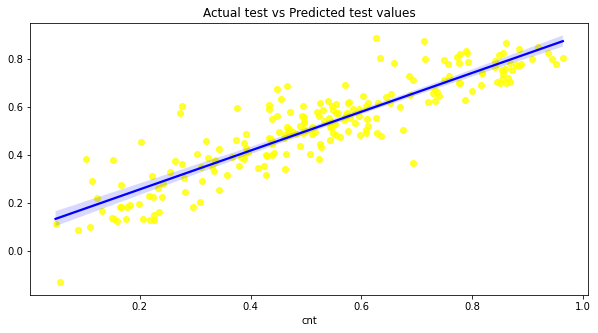

In [201]:
#lets plot the y test predictions and y test data
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y = y_pred_test,scatter_kws={'color':'yellow'}, line_kws={'color':'blue'})
plt.title('Actual test vs Predicted test values')
plt.show()

- from the above we can tell that our model is best fit for the given data set

In [205]:
#check the residual error
error=y_test - y_pred_test


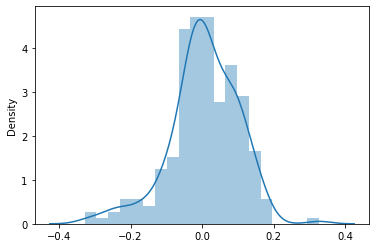

In [206]:
# plot the error
sns.distplot(error, bins=20)
plt.show()

- from the above we can tell that normal distribution of errors is arround a mean of 0

## Assessing the model Quality


In [207]:
# check the R2 score for test data
r2_test=r2_score(y_test, y_pred_test)
r2_test

0.8074869048294193

In [208]:
# lets check the difference between the r2 score of train and test data
r2_diff=r2_train-r2_test
r2_diff

0.024715836814588554

- from the above the r2_diff is 0.0247 which is less than 5% so the model quality is good 

## Equation for Prediction

In [209]:
#let's see the final model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          3.10e-186
Time:                        17:37:21   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


- from the above constant for the equation is 0.2531 and using coefficients we can genrate the equation

- __Bikedemand=0.2531+(0.2342* year)-(0.0980* holiday)+(0.4498* temperature)-(0.1395* windspeed)-(0.1123* spring)+(0.0449* winter)-(0.0729* Jul)+(0.0573* Sep)-(0.2855* light rain and light snow)-(0.0796* mist and cloudy)__

## Recommendations
- bikedemand is increses from 2018 to 2019,this means company has a annual growth
- in the winter  the bike demand is expected to increse compared to other months and in the bike demand is incresing  in september month so increse the bike inthis moth to get profits
- most important is bikedemand is increses with temprature, so it is necessary capacity is needed in hottest months
- in the month of jul and rainy days and cloudy days demand is decreasing so promote the products with some advertisements